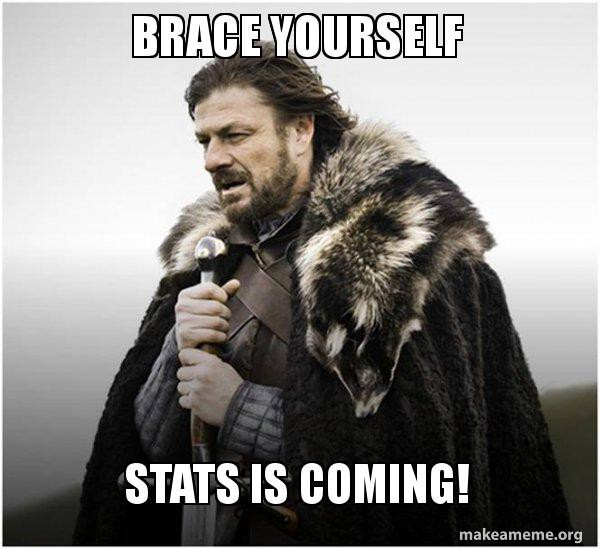

# Módulo 1

In [250]:
# Bibliotecas que usaremos ao longo do código
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import jupyterthemes as jt

In [258]:
# Estilização dos gráficos
jt.jtplot.style(theme = 'monokai', spines = False)

In [366]:
# Construindo o portfolio
tickers = ['HD', 'LOW']
portfolio = yf.download(tickers = tickers, period = '3y')['Adj Close']
portfolio = portfolio.pct_change().dropna()*100  # Repare que os NA estão dropados e os retornos em porcentagem
portfolio.head()

[*********************100%***********************]  2 of 2 completed


,HD,LOW
Date,,
2018-11-20,-2.615336,-5.659559
2018-11-21,0.147875,2.541210
2018-11-23,-0.265799,-0.633714
2018-11-26,0.574482,1.708224
2018-11-27,2.002107,2.608909


In [352]:
# Pesando o meu portfolio por meio do dot
weights = [0.5, 0.5] # O datacamp mostrou maneiras mais automatizadas de pesar o portfolio (em caso de muitas ações)
portfolio_retorno = portfolio.dot(weights) # Isso também pode ser feito pelo mul, como no datacamp (módulo 2)
portfolio_retorno.round(2).head()

Date
2018-11-20   -4.14
2018-11-21    1.34
2018-11-23   -0.45
2018-11-26    1.14
2018-11-27    2.31
dtype: float64

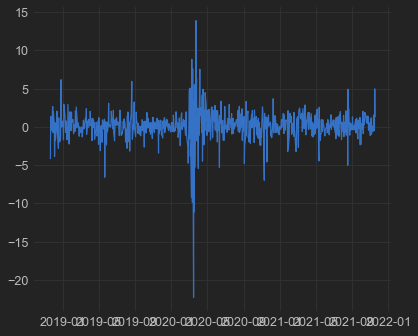

In [306]:
plt.plot(portfolio_retorno)
plt.show()

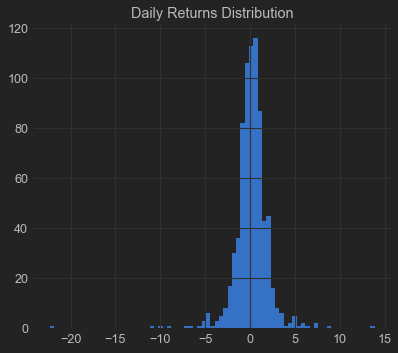

In [307]:
# plotando as distribuições dos retornos (x) e suas frequências (y)
plt.hist(portfolio_retorno, bins = 75)
plt.title(label = "Daily Returns Distribution")
plt.show()

In [308]:
# Cálculo do sigma: desvio padrão
sigma_diario = np.std(portfolio_retorno)

# Cálculo da variância: desvio padrão ao quadrado
variancia_diaria = sigma_diario**2
print(round(variancia_diaria,2)

3.98


In [315]:
# Anualizando o desvio padrão
sigma_anualizado = sigma_diario*(252**(1/2))
print(f'sigma anualizado:', round(sigma_anualizado, 2))

# Anualizando a variância (1)
variancia_anualizada_1 = sigma_anualizado**2
print(f'variancia anualizada 1:', round(variancia_anualizada_1,2))

# Annualizando a variância (2)
variancia_anualizada_2 = variancia_diaria*252
print(f'variancia anualizada 2:',round(variancia_anualizada_2,2))

sigma anualizado: 31.67
variancia anualizada 1: 1002.99
variancia anualizada 2: 1002.99


Third moment: Skewness e Kurtosis

Skewness:
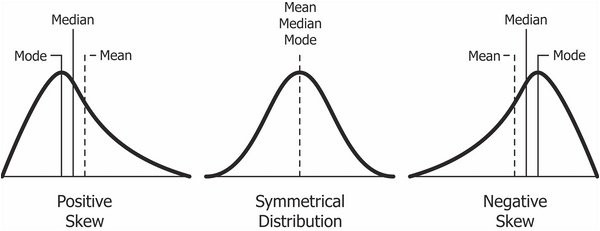


In [329]:
from scipy.stats import skew

# Calculando a skewness do portfolio igualitariamente mensurado
returns_skewness = skew(portfolio_retorno)
print(f'skewness:', returns_skewness)

# Na teoria, isso significa que o retorno médio desse portfolio equivale a mediana dos retornos
comprovação = portfolio_retorno.mean()-portfolio_retorno.median()
print(f'media - mediana =', comprovação)

skewness: -1.8557986263641528
media - mediana = -0.057188429138047725


Kurtosis:
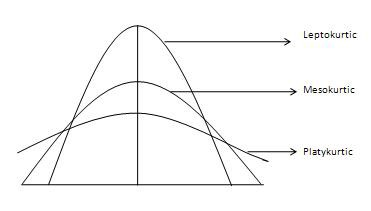


In [336]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Kurtosis acima do benchmark 3 (se alta, pode ser um indicador de alto risco)
kurtosis_extra = kurtosis(portfolio_retorno)
print(f'kurtosis extra:', round(kurtosis_extra, 2))

# Kurtosis nominal
kurtosis_nominal = 3 + kurtosis_extra
print(f'kurtosis nominal:', round(kurtosis_nominal,2))

kurtosis extra: 27.18
kurtosis nominal: 30.18


In [371]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Testando
shapiro_resultado = shapiro(portfolio_retorno)
print("Shapiro:", shapiro_resultado)

# Extract the p-value from the shapiro_results
p_value = shapiro_resultado[1]
print("P-value: ", round(p_value))

Shapiro: ShapiroResult(statistic=0.804800808429718, pvalue=3.5335181134418445e-29)
P-value:  0


# Módulo 2

O conceito de Market Capitalization: qual o valor do portfólios aos olhos de Wall Street?

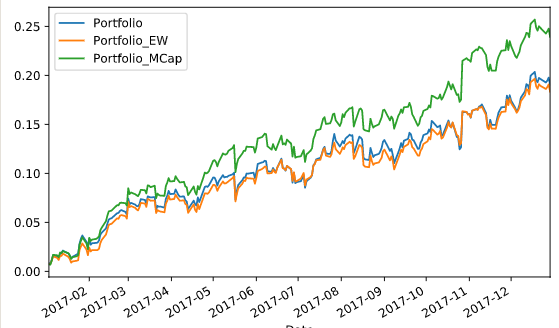

In [362]:
# Matriz de covariancia entre as ações
matriz_covar = portfolio.cov()

# Matriz de covarianacia entre as ações anualizada
matriz_covar*252

,HD,LOW
HD,897.763851,900.416429
LOW,900.416429,1317.511117


O curso do Datacamp também foi um pouco mais a fundo no cálculo dos devio padrão do portfolio
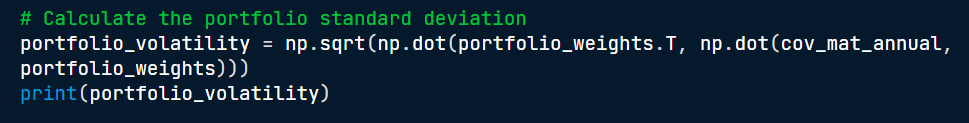

# Fronteira Eficiente

O curso deu uma pincelada na fronteira eficiente (com o qual tivemos contato no case). Mais para frente, entraremos com mais profundidade nesse tópico.



Antes da fornteira em si, é importante entender o conteito do Sharpe Ratio

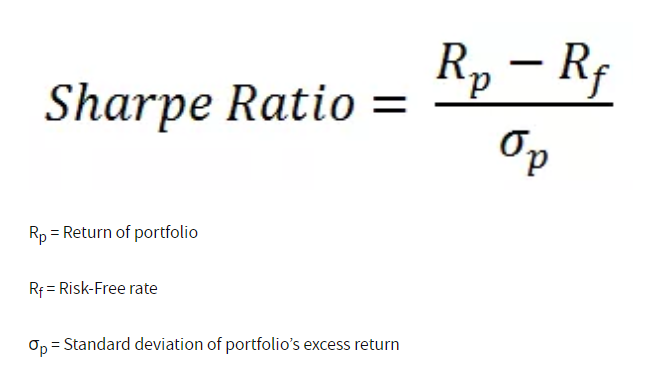



A fronteira, o portfolio GMV (Global Minimum Volatility) e o portfolio MSR (Maximum Sharpe Ratio)

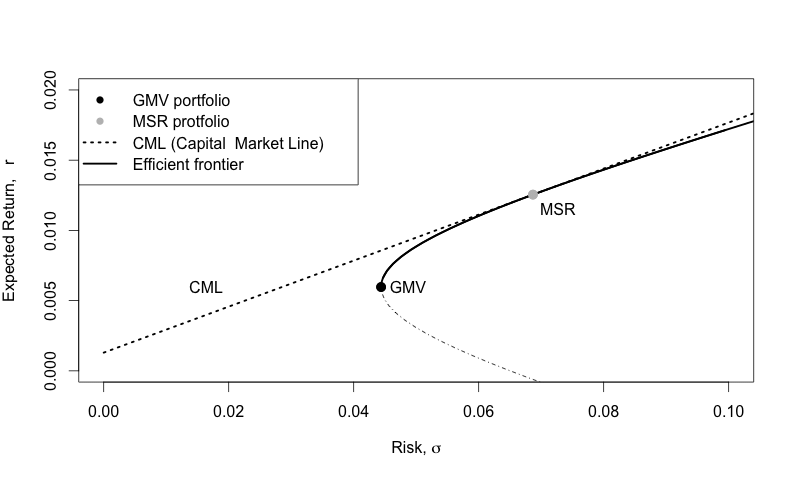

In [369]:
# Nosso Risk free rate
risk_free = 1.65

# Calculando os Sharpe Ratios diários do portfólio (já que a parte da randomização está nos próximos módulos)
portfolio['Sharpe'] = (portfolio_retorno - risk_free)/ variancia_diaria

# Deta Sharpe ratios
print(portfolio['Sharpe'].describe()[['min', 'max']])

min   -6.012762
max    3.073090
Name: Sharpe, dtype: float64
